In [2]:
import Pkg
Pkg.add(["Plots","Distributions","LsqFit","Random","Polynomials","Statistics"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [3]:
using Plots, Distributions, LsqFit, Random, Statistics

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: GR


# Model Selection

In this chapter we will discuss on how to select between alternative models.  This question often boils down to the question on how many parameters can be supported by a model.  A typical example question would be: How many peaks can we identify in a spectrum?

Before we go into the details, we need to formulate our problem in a Bayesian way:
Let us assume that we want to compare two models or hypothesis $H_1$ and $H_2$.  The first has no parameters and the second one has one parameter $\lambda$.  This argument can be generalized to comparing any two theories with different number of parameters.  To tell which hypothesis is the better one we calculate the posterior ratio:

$$PR = \frac{P(H_{1} \mid D)}{P(H_{2} \mid D)}$$

if PR is greater than one we would prefer $H_1$ over $H_2$, but if PR is on the order unity then the data is not sufficient to make a decision.  We will now use Bayes theorem to get a better sense on how to calculate this ratio.

$$\frac{P(H_{1} \mid D)}{P(H_{2} \mid D)}=\frac{P(D \mid H_{1})}{P(D \mid H_{2})}\frac{P(H_{1})}{P(H_{2})}$$

the nice thing about this ratio is that $P(D)$ cancels because it is the same for both hypothesis.  The last ratio is the ratio of priors and we should probably assume it to be of the order unity.  This is unless there is reason to believe that one hypothesis is more likely to be true then the other one.  This leaves the first ratio.  $P(D\mid H_{1})$ is easy but $P(D\mid H_{2})$ involves a parameter which we can get to by expressing it as

$$P(D \mid H_{2}) = \int P(D, \lambda \mid H_{2})d\lambda = \int P(D \mid \lambda, H_{2})P(\lambda \mid H_{2})d\lambda$$

$P(D \mid \lambda, H_{2})$ is just the likelihood function for hypothesis $H_{2}$ with parameter $\lambda$. $P(\lambda \mid H_{2})$ is the prior an reflects the knowledge of the range of $\lambda$ that is known before the experiment.

Lets now assume that $\lambda$ must lie between two values $\lambda_{min}$ and $\lambda_{max}$ which will assign a uniform prior:

$$P(\lambda \mid H_{2}) = \frac{1}{\lambda_{max}-\lambda_{min}} \quad \textrm{for} \quad \lambda_{min} \le \lambda \le \lambda_{max}$$

after the measurement we will find that a particular value of $\lambda_{0}\pm \delta \lambda$ yields the closest agreement with the data.  The corresponding probability $P(D \mid \lambda_{0},H_{2})$ will be the maximum of $H_{2}$'s likelihood function.  Let us also assume that we can represent the full likelihood as a Gaussian:

$$P(D \mid \lambda, H_{2}) = P(D \mid \lambda_{0},H_{2}) \exp \Big[ -\frac{(\lambda-\lambda_{0})^2}{2\delta \lambda^2} \Big]$$

since the uniform prior does not explicitly depend on $\lambda$ we can calculate

$$P(D \mid H_{2}) = \frac{1}{\lambda_{max}-\lambda_{min}} \int_{\lambda_{min}}^{\lambda_{max}}P(D \mid \lambda, H_{2})$$

Assuming that the vast majority of the Gaussian is contained in the prior interval this reduces to:

$$P(D \mid H_{2}) = \frac{P(D \mid \lambda_{0},H_{2})\delta \lambda \sqrt{2\pi}}{\lambda_{max}-\lambda_{min}} $$

Finally the posterior ratio can be written using three terms:

$$\frac{P(H_{1} \mid D)}{P(H_{2} \mid D)}=\frac{P(H_{1})}{P(H_{2})}\frac{P(D \mid H_{1})}{P(D \mid \lambda_{0},H_{2})}\frac{\lambda_{max}-\lambda_{min}}{\delta \lambda \sqrt{2\pi}}$$

the first term is our bias with respect to the two theories (should be unity), the second tells us about how well the two theories fit the data (this should be in favor of $H_{2}$ since it has a free parameter).  The third term can be seen as penalizing the introduction of the parameter.  Since $\lambda_{max}-\lambda_{min}$ should, in general, be larger than $\delta \lambda \sqrt{2\pi}$ this factor is larger than one.  This factor is often called a Ockham factor after the thirteen-century Franciscan monk William of Ockham (or Occam, in Latin) who said "it is vain to do with more what can be done with fewer".
But instead of blindly applying Ockams razor, we now have a quantitative tool to determine how many paramaters are supported by the data.

In [5]:
xdata = range(0, stop=10, length=11)

0.0:1.0:10.0

In [98]:
sigma_y = 1.0
d = Normal(0,sigma_y)

Normal{Float64}(μ=0.0, σ=1.0)

In [100]:
ydata = 1.0 .+ 2.0 .* xdata + 0.05 .* xdata .^2 + rand(d,length(xdata))

11-element Vector{Float64}:
  1.7738895550475717
  2.7313769002310604
  4.726441033534871
  6.801259803894982
  8.42372036936321
 10.575602248545987
 14.683259871285614
 16.053988028890164
 19.558912287055243
 22.840442440053057
 25.314401583256267

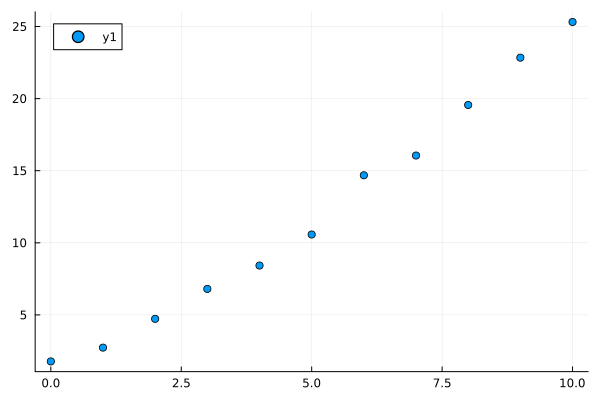

In [101]:
scatter(xdata, ydata)

In [24]:
@. linmodel(x, p) = p[1] + p[2]*x
@. quadmodel(x, p) = p[1] + p[2]*x + p[3]*x^2

quadmodel (generic function with 1 method)

In [102]:
ylin_true = linmodel(xdata, [1.0,2.0])
yquad_true = quadmodel(xdata, [1.0,2.0,0.05])

11-element Vector{Float64}:
  1.0
  3.05
  5.2
  7.45
  9.8
 12.25
 14.8
 17.45
 20.2
 23.05
 26.0

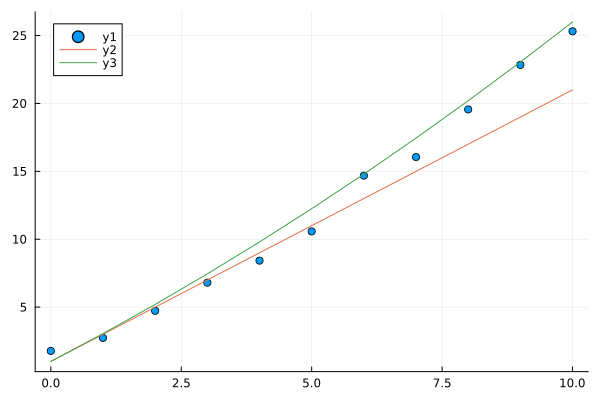

In [103]:
scatter(xdata, ydata)
plot!(xdata,ylin_true)
plot!(xdata,yquad_true)

In [27]:
plin0 = [1.0, 2.0]
pquad0 = [1.0, 2.0, 0.05]

3-element Vector{Float64}:
 1.0
 2.0
 0.05

In [104]:
linfit = curve_fit(linmodel, xdata, ydata, plin0)
quadfit = curve_fit(quadmodel, xdata, ydata, pquad0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([1.459607068854923, 1.4446778884150153, 0.09862424026177385], [-0.31428248619264876, 0.2715322973006522, 0.017018773197177595, -0.12000090743904757, 0.3925860973401569, 0.5730002689283591, -1.0051128225167396, 0.3509520316967887, -0.2299307341266683, -0.3901709142593113, 0.45440839592619753], [1.0000000000095686 0.0 0.0; 0.9999999999844464 0.9999999999781275 0.9999999999868854; … ; 1.0000000000346907 9.000000000056966 80.99999999985442; 1.0000000000346907 10.000000000085857 100.00000000030195], true, Float64[])

In [105]:
coef(linfit), coef(quadfit)

([-0.019756535002391926, 2.4309202910220185], [1.459607068854923, 1.4446778884150153, 0.09862424026177385])

In [106]:
stderror(linfit)

2-element Vector{Float64}:
 0.6110158047893839
 0.10328052141712815

In [107]:
stderror(quadfit)

3-element Vector{Float64}:
 0.4008473008265819
 0.1864977826144847
 0.017962397055533368

In [108]:
linfity = linmodel(xdata,coef(linfit))
quadfity = quadmodel(xdata,coef(quadfit))

11-element Vector{Float64}:
  1.459607068854923
  3.0029091975317126
  4.743459806732049
  6.681258896455934
  8.816306466703367
 11.148602517474346
 13.678147048768874
 16.404940060586952
 19.328981552928575
 22.450271525793745
 25.768809979182464

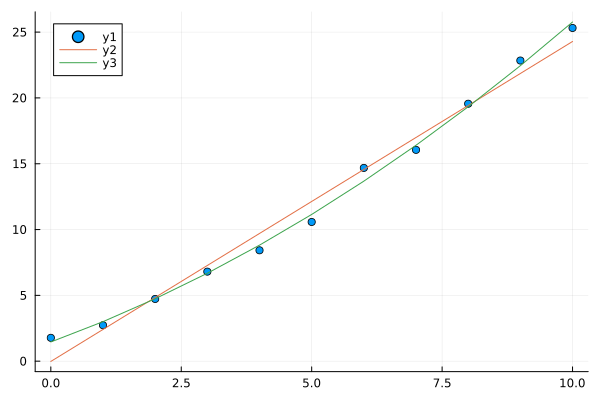

In [109]:
scatter(xdata, ydata)
plot!(xdata,linfity)
plot!(xdata,quadfity)

In [20]:
function chisq(xdata, ydata, yerr, model, params)
    ymodel = model(xdata, params)
    return sum(((ydata .- ymodel) ./ yerr) .^2)
end

chisq (generic function with 1 method)

In [110]:
chisq(xdata, ydata, sigma_y, linmodel, coef(linfit))

10.56019744657831

In [111]:
chisq(xdata, ydata, sigma_y, quadmodel, coef(quadfit))

2.214653867706747

In [112]:
lambda_max_minus_min = 0.1
delta_quad_coef = stderror(quadfit)[3]

0.017962397055533368

In [113]:
factor_pp = lambda_max_minus_min/delta_quad_coef/sqrt(2*π)

2.2209857580146153

In [114]:
p_ratio = exp((chisq(xdata, ydata, sigma_y, quadmodel, coef(quadfit))-chisq(xdata, ydata, sigma_y, linmodel, coef(linfit)))/2)

0.015409489016174945

In [115]:
p_ratio_total = p_ratio*factor_pp

0.0342242556432072

In [116]:
1/p_ratio_total

29.21904307942134